In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

ML_df = pd.read_csv('final_2019.csv')
ML_df.tail()

,Day_Num,Num_Collisions
189,42193,128
190,42194,117
191,42195,100
192,42196,87
193,42197,24


In [3]:
# Assign the data to X and y

X = ML_df[["Day_Num"]]
y = ML_df["Num_Collisions"].values.reshape(-1, 1)
print(X.shape, y.shape)

(194, 1) (194, 1)


In [4]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### END SOLUTION

In [5]:
X_train.shape

(145, 1)

In [6]:
y

array([[124],
       [117],
       [149],
       [138],
       [130],
       [113],
       [131],
       [144],
       [153],
       [157],
       [190],
       [142],
       [119],
       [150],
       [173],
       [174],
       [169],
       [169],
       [144],
       [119],
       [128],
       [110],
       [161],
       [156],
       [179],
       [139],
       [124],
       [121],
       [157],
       [146],
       [172],
       [157],
       [183],
       [155],
       [151],
       [171],
       [122],
       [166],
       [167],
       [167],
       [128],
       [162],
       [143],
       [184],
       [168],
       [186],
       [138],
       [134],
       [139],
       [147],
       [143],
       [165],
       [198],
       [155],
       [143],
       [134],
       [154],
       [152],
       [191],
       [178],
       [142],
       [133],
       [139],
       [150],
       [184],
       [161],
       [163],
       [155],
       [131],
       [133],
       [161],
      

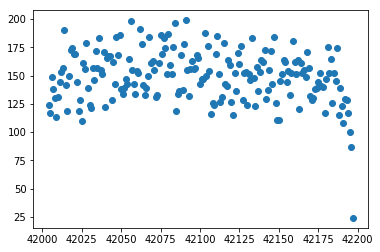

In [7]:
plt.scatter(X, y)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [10]:
len(model.coef_)

1

In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-0.08038361]]
y-axis intercept:  [3533.46846856]


In [15]:
test = 42198

In [16]:
model.predict(np.array(test).reshape((1,1)))

array([[141.44094867]])

In [21]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [124]
Predicted output: [157.03536875]
Prediction Error: [33.03536875]


In [22]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.03849749537229952


In [23]:
x_min = np.array(X.min()).reshape((1,1))
x_max = np.array(X.max()).reshape((1,1))

In [25]:
y_min_actual = np.array(y.min()).reshape((-1,1))
y_max_actual = np.array(y.max()).reshape((-1,1))

In [27]:
y_min = 3533.46846856 + -0.08038361 * x_min
y_max = 3533.46846856 + -0.08038361 * x_max

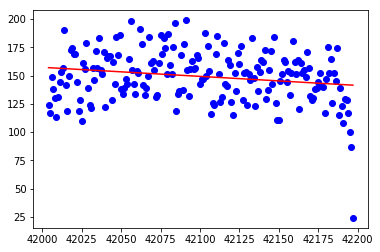

In [28]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [30]:
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)

In [31]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04096996971908107
Testing Score: 0.026805693148584275


Text(0.5, 1.0, 'Residual Plot')

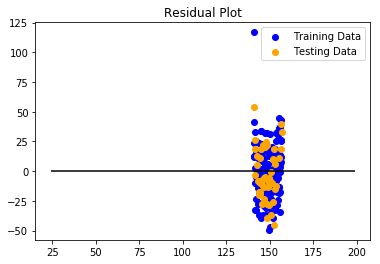

In [32]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION